### Note: This notebook is reconstruction of<a href='https://bugra.github.io/work/notes/2014-11-16/an-introduction-to-unsupervised-learning-scikit-learn/'> work </a>by  Bugra Akyildiz. The original tutorial doesn't exist now, so I came up with this. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import decomposition


## Loading dataset

In [2]:
faces = datasets.fetch_olivetti_faces()
faces_data = faces.data
faces_data.shape

(400, 4096)

- The dataset contains 400 images of 40 different persons. (10 images per person arranged in sequence)
- Each image has size 64*64 (=4096 pixels)

## Let's see some faces

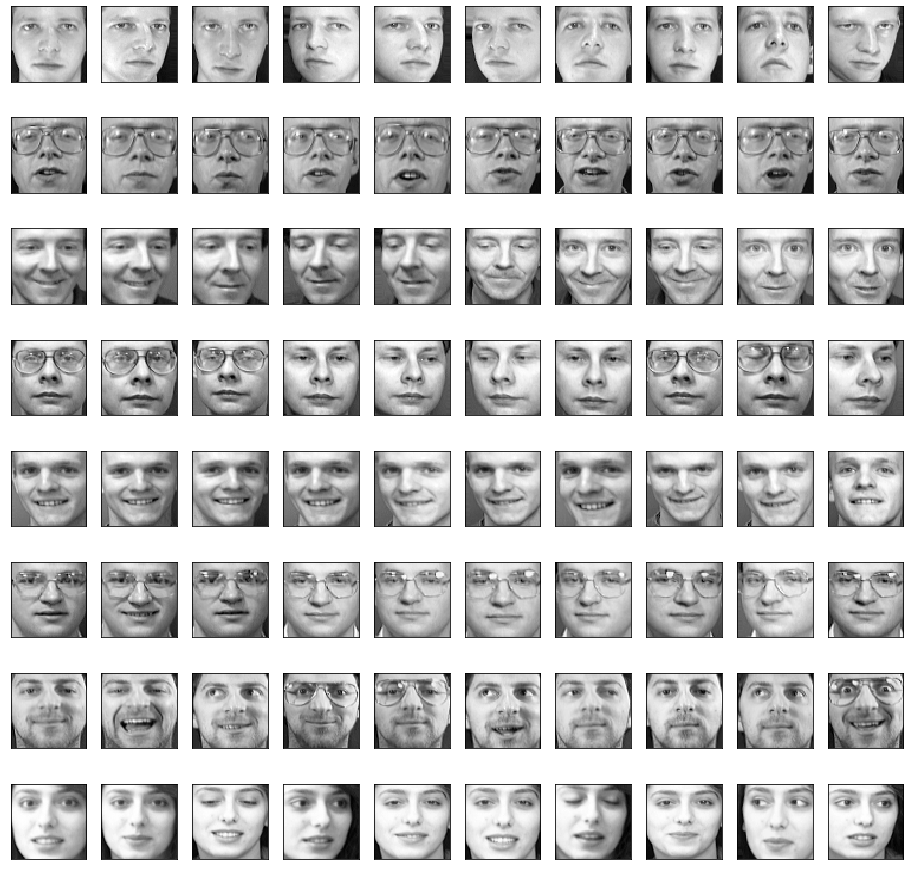

In [3]:
fig = plt.figure(figsize=(16, 16))
# plotting face for first 8 persons.
# each person has 10 different images in dataset.
for idx in range(80):
    plt.subplot(8, 10, idx+1)
    plt.imshow(faces_data[idx].reshape(64, 64), cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    


## Top 16 eigenfaces using PCA

In [4]:
n_eigenfaces = 16
pca = decomposition.PCA(n_components=n_eigenfaces, whiten=True)
pca.fit(faces_data)
pca.components_.shape

(16, 4096)

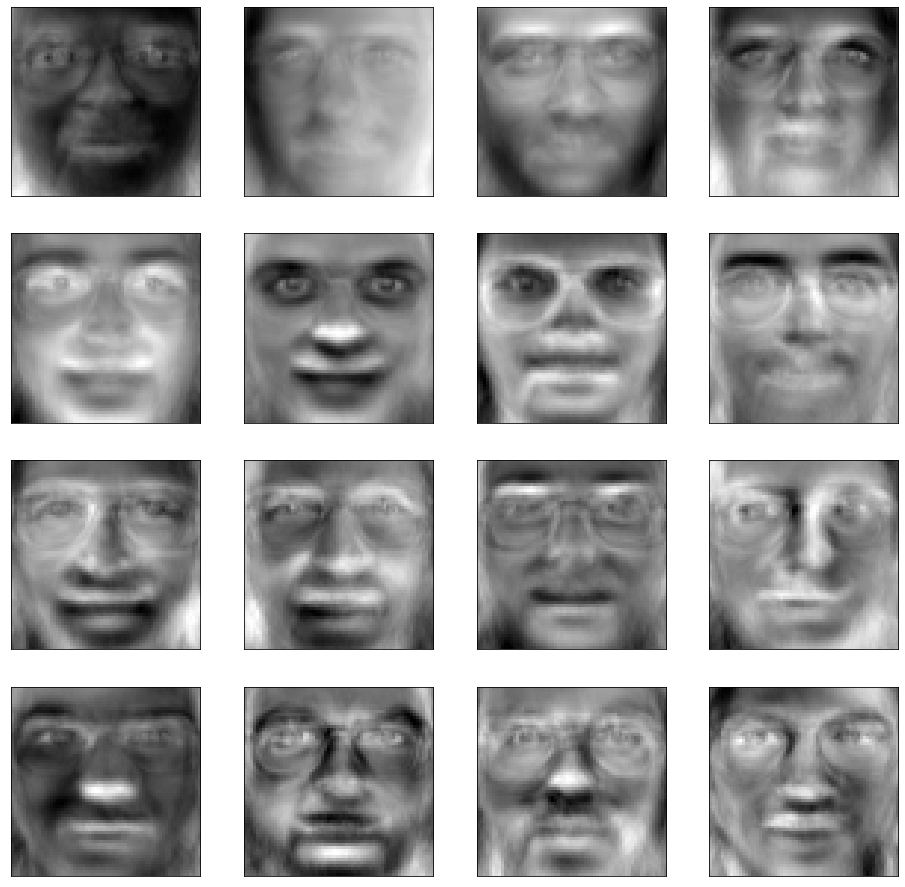

In [5]:
fig = plt.figure(figsize=(16, 16))
for idx in range(n_eigenfaces):
    plt.subplot(4, 4, idx+1)
    plt.imshow(pca.components_[idx].reshape(64, 64), cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    

## Reconstructing image (considering only top subsets of eigen vectors)

### Using top 1 principal component

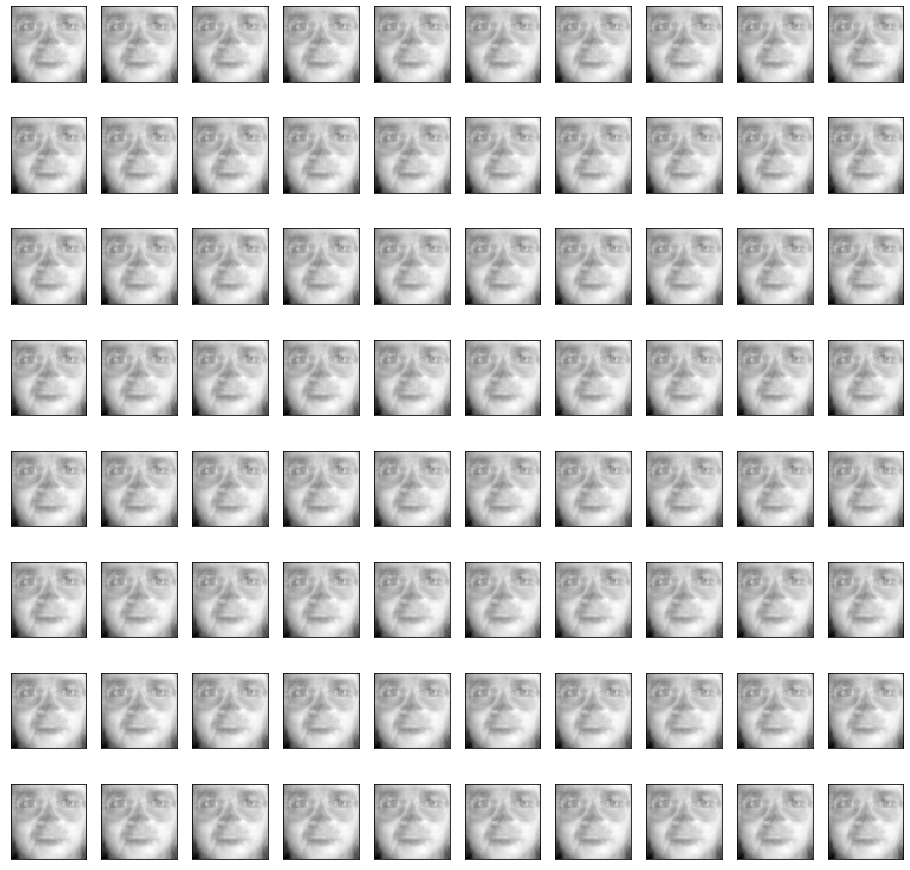

In [6]:
pca = decomposition.PCA(n_components=1, whiten=True)
pca.fit(faces_data)

faces_data_reduced = (faces_data.dot(pca.components_.T)).dot(pca.components_)
fig = plt.figure(figsize=(16, 16))
for idx in range(80):
    plt.subplot(8, 10, idx+1)
    plt.imshow(faces_data_reduced[idx].reshape(64, 64), cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    

### Using top 10 principal component

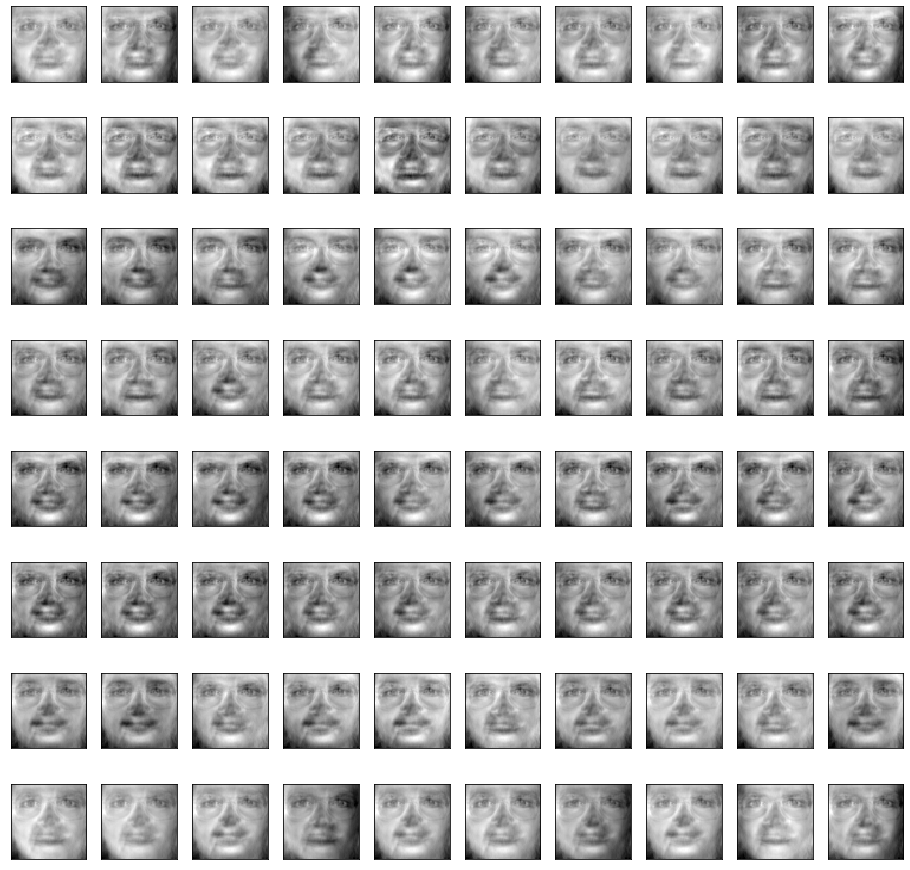

In [7]:
pca = decomposition.PCA(n_components=10, whiten=True)
pca.fit(faces_data)


faces_data_reduced = (faces_data.dot(pca.components_.T)).dot(pca.components_)
fig = plt.figure(figsize=(16, 16))
for idx in range(80):
    plt.subplot(8, 10, idx+1)
    plt.imshow(faces_data_reduced[idx].reshape(64, 64), cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

### Using top 50 principal component

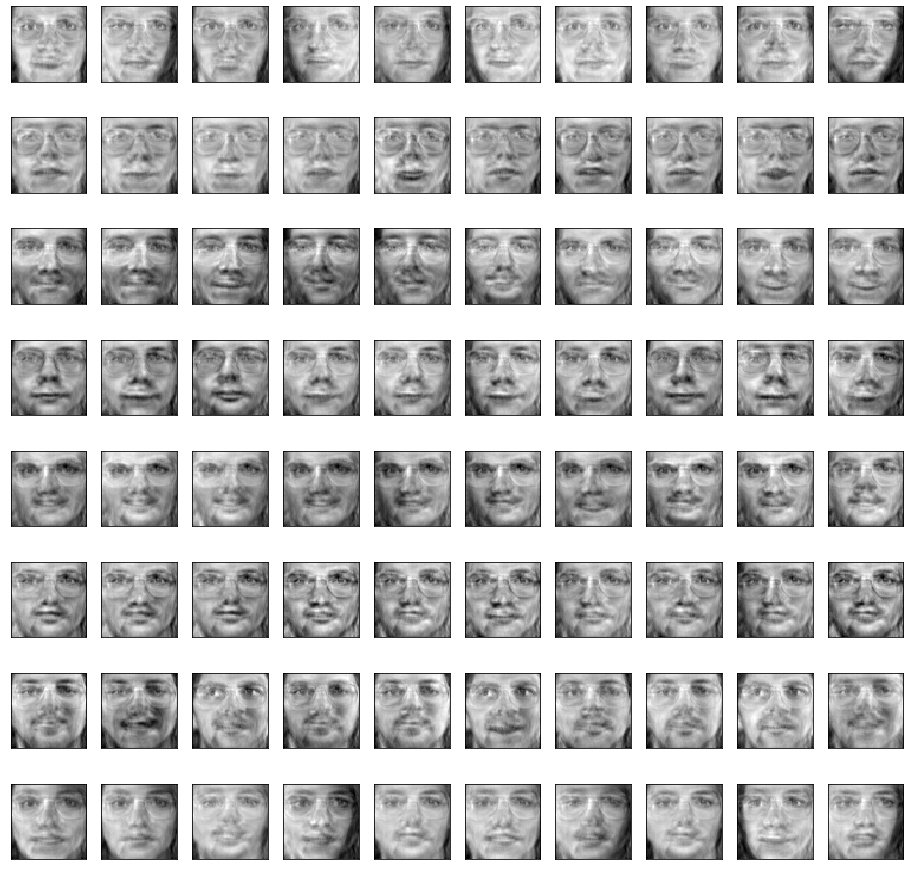

In [8]:
pca = decomposition.PCA(n_components=50, whiten=True)
pca.fit(faces_data)


faces_data_reduced = (faces_data.dot(pca.components_.T)).dot(pca.components_)
fig = plt.figure(figsize=(16, 16))
for idx in range(80):
    plt.subplot(8, 10, idx+1)
    plt.imshow(faces_data_reduced[idx].reshape(64, 64), cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

### Using top 100 principal component

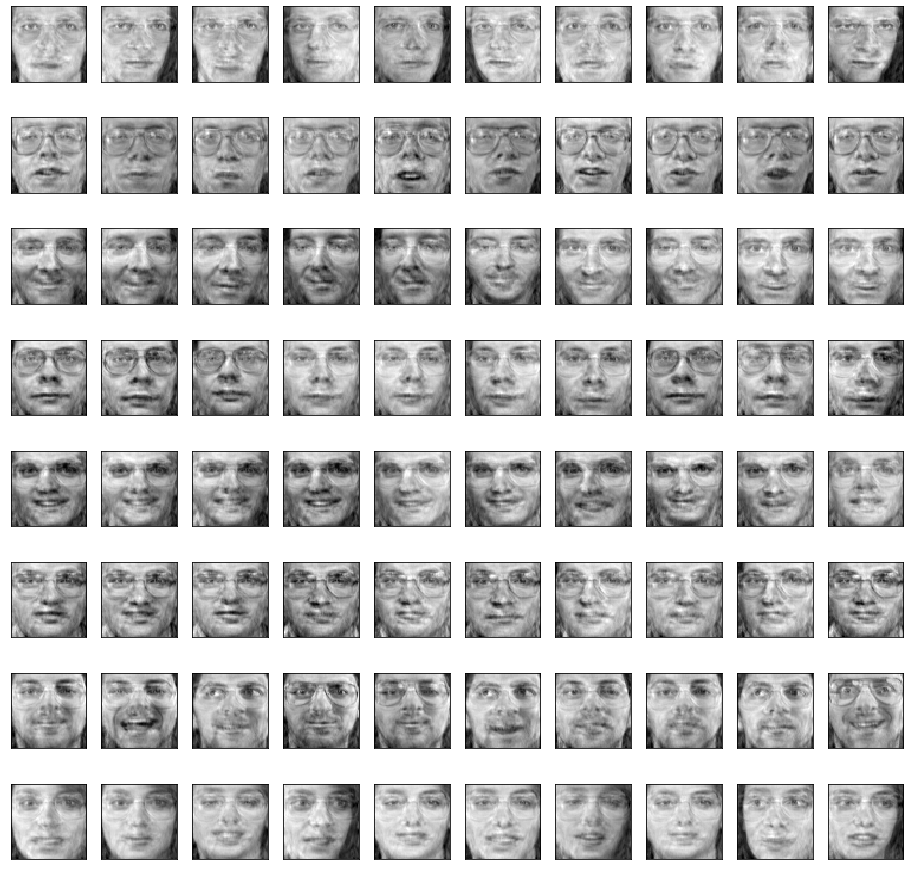

In [9]:
pca = decomposition.PCA(n_components=100, whiten=True)
pca.fit(faces_data)


faces_data_reduced = (faces_data.dot(pca.components_.T)).dot(pca.components_)
fig = plt.figure(figsize=(16, 16))
for idx in range(80):
    plt.subplot(8, 10, idx+1)
    plt.imshow(faces_data_reduced[idx].reshape(64, 64), cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

- As we add more (principal) components, we see the image starts to be close to the original one.

## Choosing #dimension to project onto ?

### Hyperparameter tuning

Text(0.5, 1.0, 'variance explained vs dimensions (only top 25 eigen vectors)')

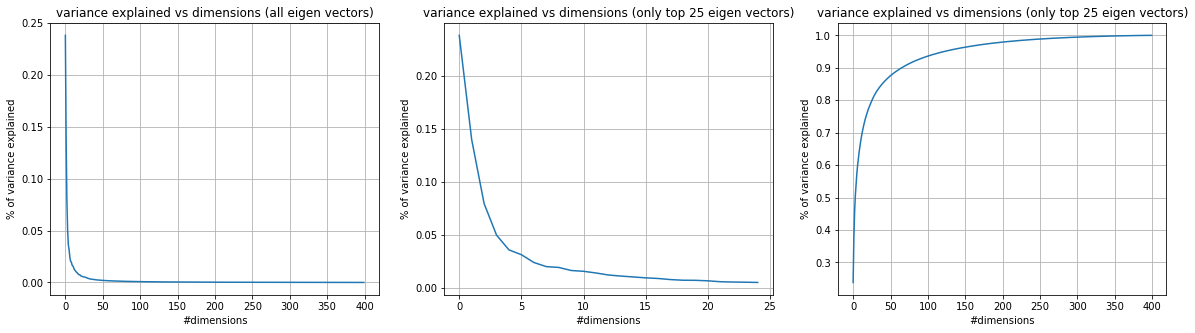

In [10]:
# run pca without n_components
# so that variance across 
pca = decomposition.PCA(whiten=True)
pca.fit(faces_data)
    
fig, axes = plt.subplots(1, 3, figsize=(20, 5))


axes[0].plot(pca.explained_variance_ratio_)
axes[0].set_xlabel("#dimensions")
axes[0].set_ylabel("% of variance explained")
axes[0].grid()
axes[0].set_title('variance explained vs dimensions (all eigen vectors)')



axes[1].plot(pca.explained_variance_ratio_[:25])
axes[1].set_xlabel("#dimensions")
axes[1].set_ylabel("% of variance explained")
axes[1].grid()
axes[1].set_title('variance explained vs dimensions (only top 25 eigen vectors)')


axes[2].plot(np.cumsum(pca.explained_variance_ratio_))
axes[2].set_xlabel("#dimensions")
axes[2].set_ylabel("% of variance explained")
axes[2].grid()
axes[2].set_title('variance explained vs dimensions (only top 25 eigen vectors)')

- The first principal component explains more than 25 percent of the variance in the dataset.
- The second principal component explains about 7 percent of the variance in the dataset.
- Almost entire variance in dataset can be expressed using just top 300 dimensions. (see third plot)


- From the third plot, we can see with 250 dimensions, we are able to explain over 95 percent variance (which should be good enough)


In [11]:
print("variance explained with top 150 dimensions: ", np.sum(pca.explained_variance_ratio_[:250])*100)

variance explained with top 150 dimensions:  98.85941743850708


### Final images (using 250 principal components)

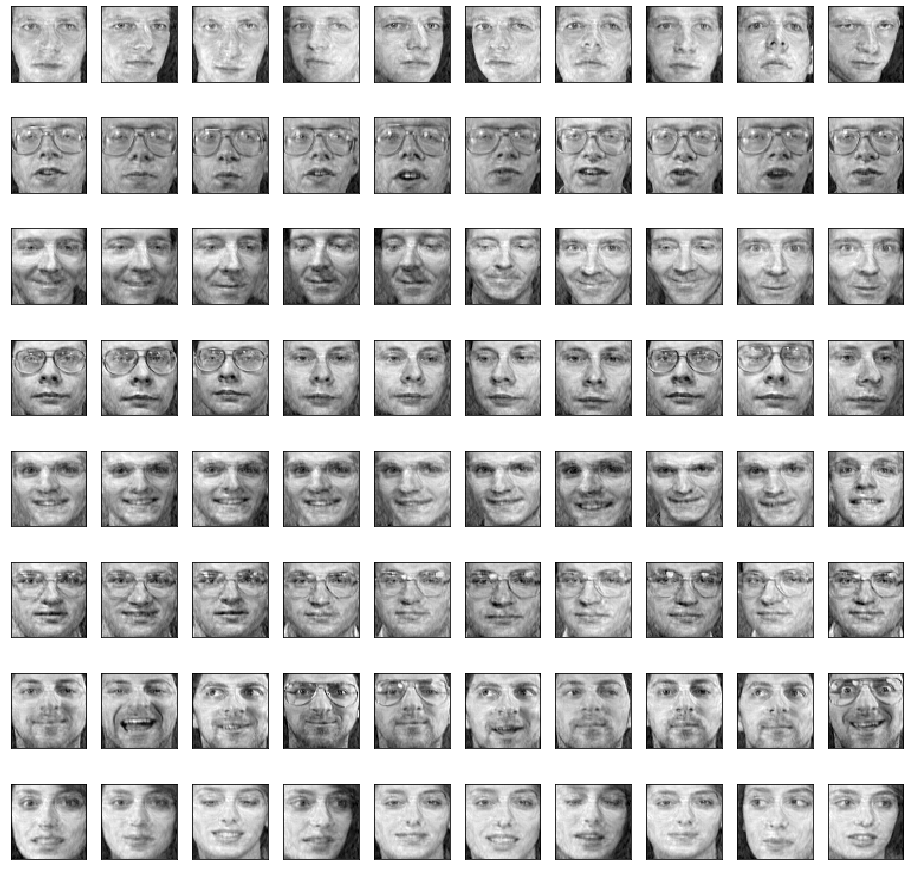

In [12]:
pca = decomposition.PCA(n_components=250, whiten=True)
pca.fit(faces_data)


faces_data_reduced = (faces_data.dot(pca.components_.T)).dot(pca.components_)
fig = plt.figure(figsize=(16, 16))
for idx in range(80):
    plt.subplot(8, 10, idx+1)
    plt.imshow(faces_data_reduced[idx].reshape(64, 64), cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

- Thus, with just 250 (out of 4096) components, we were able to generate a decent reconstruction of our original images.